In [1]:
import sys 
sys.path.append("/scratch/m/murray/dtolgay")
from tools import functions_readfiles as read_files
from tools.functions_importing_observations import read_CO_observations

import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 

In [ ]:
#     "expected": {
#         "file_path": f"{base_fdir}/L_line_smoothingLength_expected_flux2Luminosity.txt",
#         "data": pd.DataFrame(),
#         "label": "expected",
#     },
#         "hybridNDInterp": {
# #         "file_path": f"{base_fdir}/L_line_smoothingLength_hybridInterpolator_flux2Luminosity.txt",
#         "file_path": f"{base_fdir}/otherProperties_smoothingLength_hybridInterpolator.txt",
#         "data": pd.DataFrame(),
#         "label": "hybridND",        
    },
#     "nearestNDInterp": {
#         "file_path": f"{base_fdir}/L_line_smoothingLength_nearestNDInterpolator_flux2Luminosity.txt",
#         "data": pd.DataFrame(),
#         "label": "nearestND",
#     },

In [4]:
base_fdir = "/scratch/m/murray/dtolgay/cloudy_runs/z_0/m12i_res7100_md_test"

runs = {
    "regularGridInterp": {
#         "file_path": f"{base_fdir}/line_emissions_regularGridInterpolator_linear_smoothingLength.txt",
#         "file_path": f"{base_fdir}/abundance_regularGridInterpolator_linear_smoothingLength.txt",
        "file_path": f"{base_fdir}/temperature_regularGridInterpolator_linear_smoothingLength.txt",
        "data": pd.DataFrame(),
        "label": "regularGridND",
    },      
}

for run in runs.keys():
    
#     runs[run]["data"], file_specific_columns = read_files.read_interpolated_Lline_usingFilePath(path=runs[run]["file_path"], interpolation_type="line_emissions")
#     runs[run]["data"], file_specific_columns = read_files.read_interpolated_Lline_usingFilePath(path=runs[run]["file_path"], interpolation_type="abundance")
    runs[run]["data"], file_specific_columns = read_files.read_interpolated_Lline_usingFilePath(path=runs[run]["file_path"], interpolation_type="temperature")


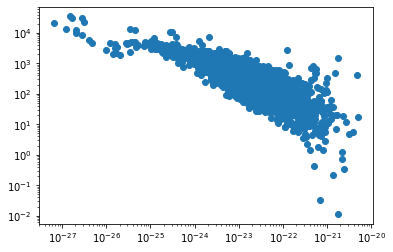

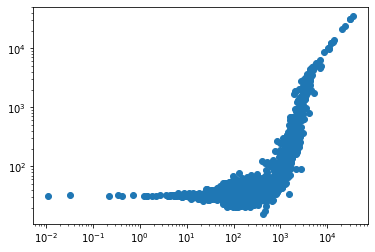

In [8]:
plt.scatter(
    runs["regularGridInterp"]["data"]["density"],
    runs["regularGridInterp"]["data"]["T"],
)
plt.xscale("log")
plt.yscale("log")
plt.show()


plt.scatter(
    runs["regularGridInterp"]["data"]["T"],
    runs["regularGridInterp"]["data"]["Th2"],
)
plt.xscale("log")
plt.yscale("log")


In [12]:
# from scipy.interpolate import RBFInterpolator
import scipy
print(scipy.__version__)

1.5.2


# Import observations 

In [ ]:
XCOLDGASS_df, PHIBBS2_df, ALMA_df, Leroy_df = read_CO_observations(base_dir="/home/m/murray/dtolgay/Observations")

# Compare

In [ ]:
line_name = "L_co_10"



fig, ax = plt.subplots(figsize=(7, 4), dpi = 200, facecolor = "white")

# ############ xCOLDGASS

# cond_FLAG_1 = (XCOLDGASS_df["FLAG_CO"] == 1).astype(bool)
# cond_FLAG_2 = (XCOLDGASS_df["FLAG_CO"] == 2).astype(bool)
# ax.scatter(
#     XCOLDGASS_df.loc[cond_FLAG_1, 'SFR'], XCOLDGASS_df.loc[cond_FLAG_1, 'Lco'], 
#     facecolors='none', edgecolors='tab:blue', label="Saintonge+17", s=10,
# )
# ax.scatter(
#     XCOLDGASS_df.loc[cond_FLAG_2, 'SFR'], XCOLDGASS_df.loc[cond_FLAG_2, 'Lco'], 
#     marker=r"$\downarrow$", s=10, facecolors='none', edgecolors='tab:cyan', label=r"Saintonge+17 3$\sigma$ upper limit"
# )


for run in runs.keys():
    ax.scatter(
        sum(runs[run]['data']['sfr']),
        sum(runs[run]['data'][line_name]),
        label = runs[run]['label'],
    )


## Figure options
axes_number_size = 16

plt.yscale("log")
plt.xscale("log")

# plt.grid(which = "minor")

plt.xlabel("SFR [$M☉/yr$]")
plt.ylabel(fr"{line_name} [$K$ $km$ $s^{-1}$ $pc^2$]")

ymin = 1e4
ymax = 1e10
difference_in_log_space = int(np.log10(ymax/ymin))
yticks = 10**np.linspace(start = np.log10(ymin), stop = np.log10(ymax), num=difference_in_log_space+1)

plt.ylim([ymin, ymax])
plt.yticks(yticks)
plt.legend()

plt.xlim([2e-2, 2e2])
plt.xticks([1e-1, 1e0, 1e1])


# # Customize major ticks
ax.tick_params(axis='both', which='major', labelsize=axes_number_size, length=7, width=2, colors='black', direction = "in")
ax.tick_params(axis='both', which='minor', labelsize=axes_number_size, length=5, width=1, colors='black', direction = "in")

plt.show()

In [ ]:
for run in runs.keys():
    label = runs[run]['label']
    Lco = sum(runs[run]['data']['L_co_10'])
    print(f"{label}: Lco: {Lco:.2e}")


In [ ]:
x = np.linspace(0, max(runs['expected']['data']['L_co_10']), num=int(1e3))
y = x

for run in runs.keys():
    if run != 'expected':
        plt.figure()
        
        plt.scatter(
            runs[run]['data']['L_co_10'],
            runs['expected']['data']['L_co_10'],            
        )
        
        plt.xlabel(run)
        
        plt.plot(x,y,c="Black")
        plt.xscale("log")
        plt.yscale("log")
        plt.xlim([1e1, 5e5])
        plt.ylim([1e1, 5e5])  
        
        plt.show()
        

In [ ]:
plt.scatter(
    runs['regularGridInterp']['data']['L_co_10'],
    runs['hybridNDInterp']['data']['L_co_10'],            
)

plt.plot(x,y,c="Black")
plt.xscale("log")
plt.yscale("log")
plt.xlim([1e1, 5e5])
plt.ylim([1e1, 5e5])  

plt.show()